<a href="https://colab.research.google.com/github/RogerPineda13/Healthcare_Persistency_of_a_drug/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

from sklearn.metrics import precision_score, recall_score, log_loss, plot_confusion_matrix,\
accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [6]:
# function to calculate different types of model scores and cross validation score.
# at the end of the function, confusion matrix is plotted

def model_score(model, X, y_predict, y_true):
    acc = accuracy_score(y_predict, y_true)
    rec = recall_score(y_predict, y_true, average='weighted')
    f1 = f1_score(y_predict, y_true, average='weighted')
    prec = precision_score(y_predict, y_true, average='weighted')
    cross = cross_val_score(estimator=model, X=X, y=y_true, cv=10).mean()
    
    print(f' The accuracy score is: {round(acc, 4)}')
    print(f' The cross validation score of accuracy is: {round(cross, 4)}')
    print(f' The recall score is: {round(rec, 4)}')
    print(f' The F1 score is: {round(f1, 4)}')
    print(f' The precision score is: {round(prec, 4)}')
    
    return plot_confusion_matrix(model, X, y_true);

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_m.pkl to data_m.pkl


In [3]:
with open('data_m.pkl', 'rb') as datapickled:
    data_df=pickle.load(datapickled)
     

In [5]:
data_df.head()

,Persistency_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,...,Adherent_Flag_Adherent,Adherent_Flag_Non-Adherent,Count_Of_Risks_0,Count_Of_Risks_1,Count_Of_Risks_2,Count_Of_Risks_3,Count_Of_Risks_4,Count_Of_Risks_5,Count_Of_Risks_6,Count_Of_Risks_7
0,1,0,0,0.0,0,0,0,0,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0.0,0,0,0,0,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0.0,0,0,0,0,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0.0,0,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0.0,0,0,0,0,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Train Test Split
X = data_df.drop(['Persistency_Flag'], axis=1)
y = data_df['Persistency_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0.6291970802919709


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


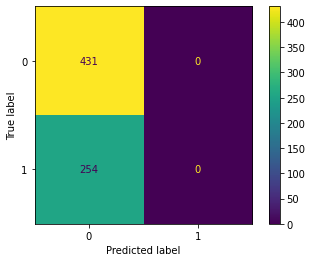

In [8]:
dummy = DummyClassifier(random_state=42)
dummy.fit(X_train, y_train)
print(dummy.score(X_test, y_test))

plot_confusion_matrix(dummy, X_test, y_test);

Training data model score:
 The accuracy score is: 0.8237
 The cross validation score of accuracy is: 0.8091
 The recall score is: 0.8237
 The F1 score is: 0.8259
 The precision score is: 0.8309


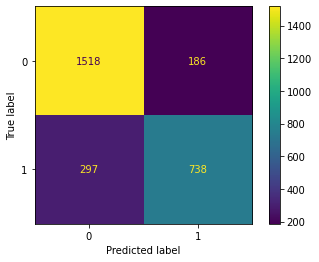

In [13]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_y_pred_train = logistic_model.predict(X_train)

print("Training data model score:")
log_train_score = model_score(logistic_model, X_train, logistic_y_pred_train, y_train)

Training data model score:
 The accuracy score is: 0.8101
 The cross validation score of accuracy is: 0.7565
 The recall score is: 0.8101
 The F1 score is: 0.8224
 The precision score is: 0.8673


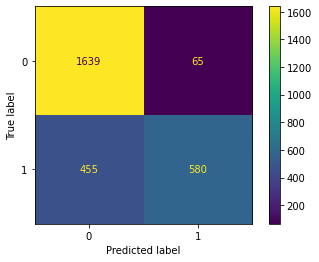

In [14]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_train)

print("Training data model score:")
knn_model_score = model_score(knn, X_train, knn_pred, y_train)

In [17]:
grid = {
    'n_neighbors' : [1,2,3,4,5,6],
    'p' : [1,2],
    'leaf_size' : [10,20,30]
}
knn_grid_search = GridSearchCV(knn, grid, cv=3)
knn_grid_search.fit(X_train, y_train)

print(f'Best parameters are {knn.best_params_}')
print(f'Best score {gs_dt.best_score_}')
print(f'Best estimator score {gs_dt.best_estimator_.score(X_test_clean, y_test)}')


knn_grid_search.best_params_

{'leaf_size': 10, 'n_neighbors': 5, 'p': 1}

In [ ]:
#With best parans leaf 10, neigh 5, p 1